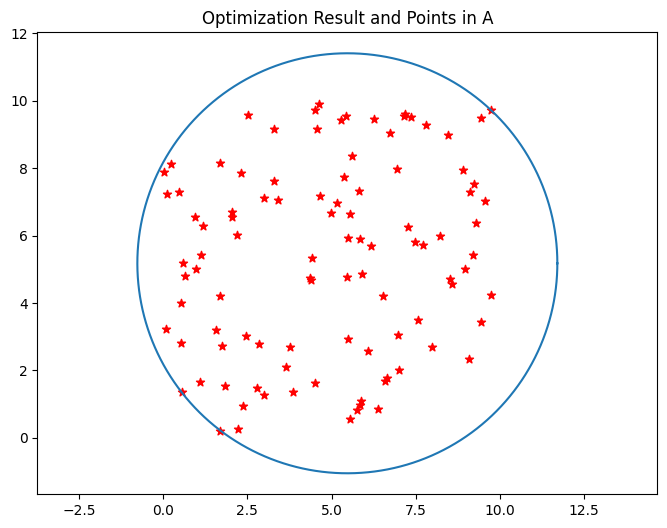

Optimized point z: [5.46827819 5.17754851], Minimized maximum distance V: 6.23324580596221


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def f_value(B, x):
    max_distance = np.linalg.norm(x - B[0, :])
    n = B.shape[0]
    for i in range(n):
        distance = np.linalg.norm(x - B[i, :])
        max_distance = max(max_distance, distance)
    return max_distance

def sub_d(B, x):
    n = B.shape[0]
    W = np.zeros(n)
    for l in range(n):
        W[l] = np.linalg.norm(x - B[l, :])
    p = np.argmax(W)
    if W[p] == 0:
        z = 0
    else:
        z = (x - B[p, :]) / np.linalg.norm(x - B[p, :])
    return z

def draw_disk(center, r):
    t = np.linspace(0, 2*np.pi, 1000)
    x = r * np.cos(t) + center[0]
    y = r * np.sin(t) + center[1]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.axis('equal')

# Integration of the main logic
def main():
    A = 10 * np.random.rand(100, 2)
    x = np.array([0, 0])
    K = 5000
    V = f_value(A, x)
    z = x.copy()
    for i in range(K):
        x = x - 0.01 * sub_d(A, x)
        if f_value(A, x) <= V:
            V = f_value(A, x)
            z = x.copy()
    draw_disk(z, V)
    plt.scatter(A[:, 0], A[:, 1], c='r', marker='*')
    plt.title("Optimization Result and Points in A")
    plt.show()
    print(f"Optimized point z: {z}, Minimized maximum distance V: {V}")

if __name__ == "__main__":
    main()